## Looking at the GrowClust results from Sep 14-20 2017 (a time when there was a lot of eq activity), for vent field earthquakes only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
outfile = '/Users/zoekrauss/GrowClust3D/endeavour/data/out/end_out_0835_2.grid3D.cat'

In [3]:
cat = pd.read_csv(outfile,header=None,delim_whitespace=True)
cat.rename(columns={0:'yr',1:'mon',2:'day',3:'hr',4:'min',5:'sec',6:'evid',7:'latR',8:'lonR',9:'depR',\
                   10:'mag',11:'ev_serialID',12:'clusterID',13:'clustersize',14:'npair',15:'ndiffP',\
                   16:'ndiffS',17:'rmsP',18:'rmsS',19:'erh',20:'erz',21:'ert',22:'latC',23:'lonC',24:'depC'},inplace=True)

# Make a datetime column
cat = cat.astype({'yr':'int','mon':'int','day':'int','hr':'int','min':'int'})
cat['eventTime'] = cat[["yr","mon","day","hr","min"]].apply(lambda x: '-'.join(x.values.astype(int).astype(str)), axis="columns")
cat['eventTime'] = cat[['eventTime','sec']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
cat['eventTime']=pd.to_datetime(cat['eventTime'],format='%Y-%m-%d-%H-%M-%S.%f')


# Isolate events that actually got relocated
reloc = cat[~cat['rmsP'].isnull()]

In [4]:
clusters = reloc['clusterID'].unique()

## Here we see that while the clusters of groups likely make sense (since they are based largely on cross-correlation information), the relative relocations are crap. This tells me that I need to do a better job of calculating those differential travel times. That's my next step!

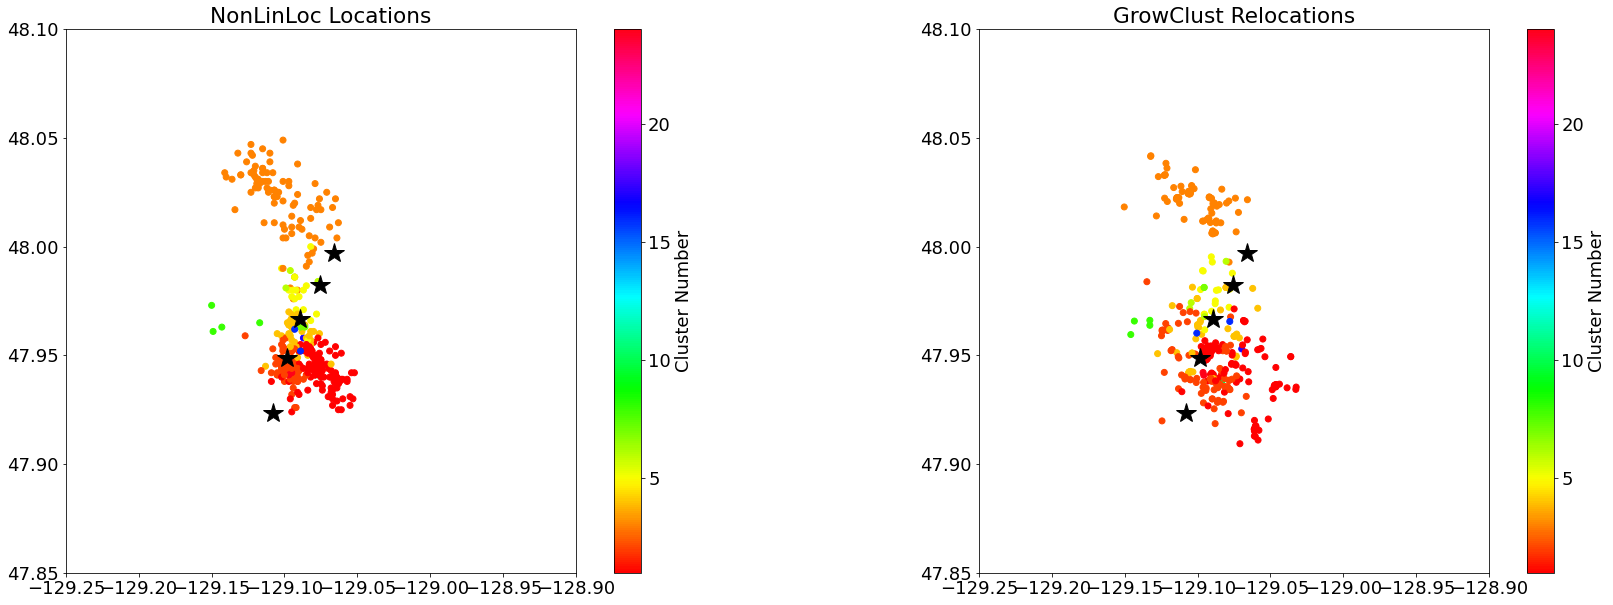

In [8]:
vent_lon=[-129.098100000000,-129.089400000000,-129.075600000000,-129.108200000000,-129.066200000000]
vent_lat=[47.9487000000000,47.9666000000000,47.9822000000000,47.9233000000000,47.9969000000000] 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1, 2,figsize=[30,10])

ax[0].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[0].set_xlim([-129.25,-128.9])
ax[0].set_ylim([47.85,48.1])
ax[0].set_aspect(1/0.67);
s =ax[0].scatter(reloc['lonC'],reloc['latC'],c=reloc['clusterID'],cmap='hsv')
ax[0].set_title('NonLinLoc Locations')
cbar = plt.colorbar(s,ax=ax[0])
cbar.set_label('Cluster Number')


ax[1].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[1].set_xlim([-129.25,-128.9])
ax[1].set_ylim([47.85,48.1])
ax[1].set_aspect(1/0.67);
s=ax[1].scatter(reloc['lonR'],reloc['latR'],c=reloc['clusterID'],cmap='hsv')
ax[1].set_title('GrowClust Relocations')
cbar = plt.colorbar(s,ax=ax[1])
cbar.set_label('Cluster Number')

In [130]:
clust = reloc[reloc['clusterID']==2]

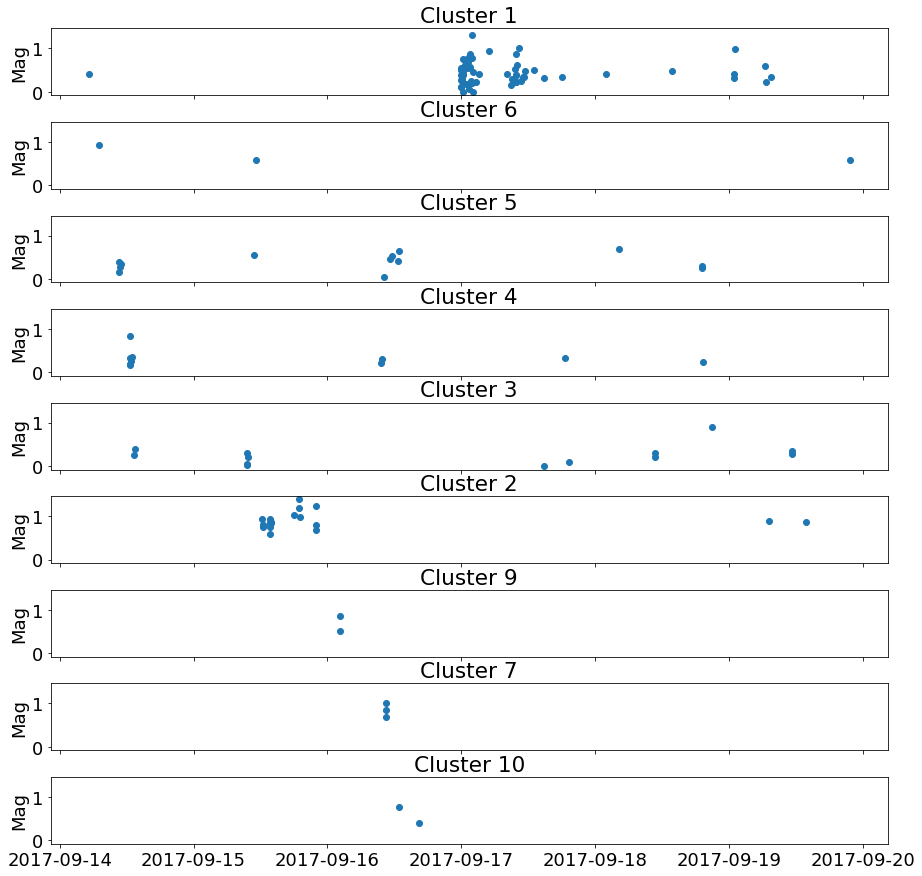

In [133]:
fig,ax = plt.subplots(len(clusters),1,sharex=True,figsize=(15,15),sharey=True)

for i,cnum in enumerate(clusters):
    
    clust = reloc[reloc['clusterID']==cnum]
    ax[i].scatter(clust['eventTime'],clust['mag'])
    ax[i].set_title('Cluster '+str(cnum))
    ax[i].set_ylabel('Mag')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

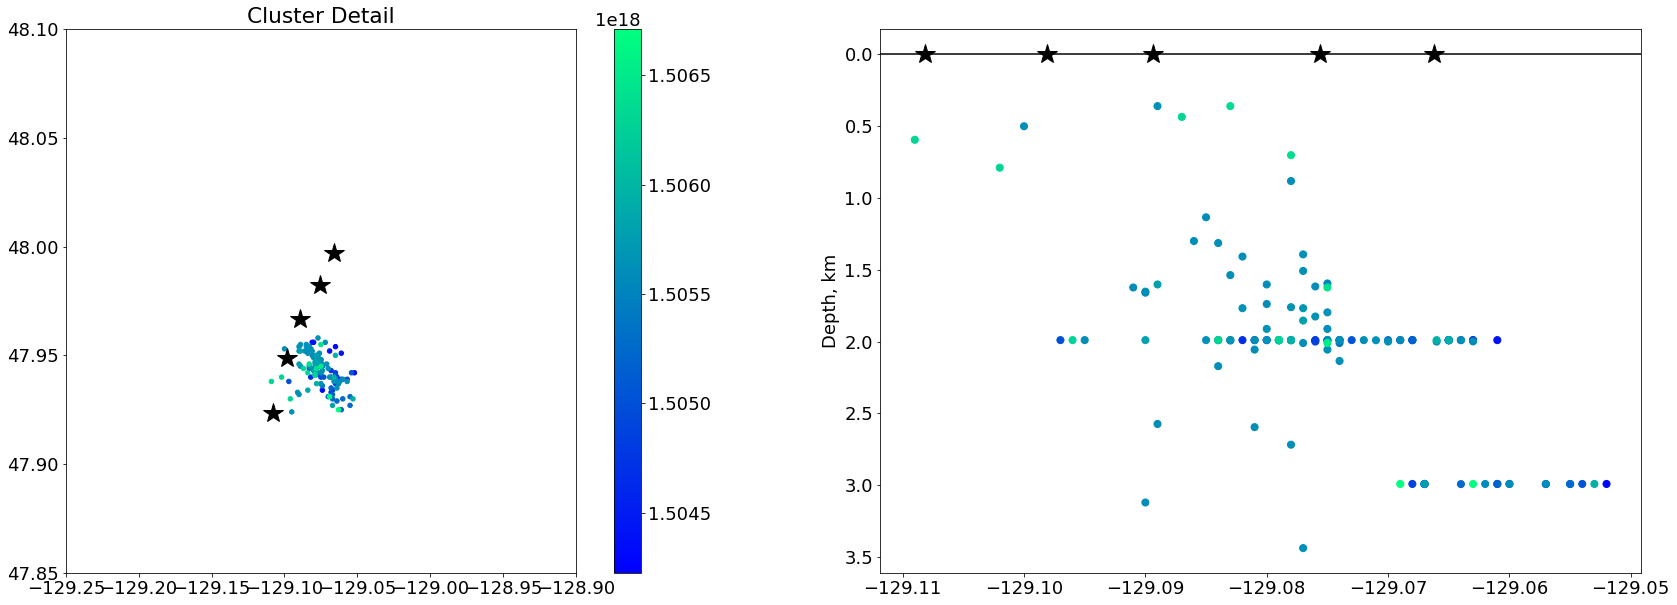

In [9]:
clust = reloc[reloc['clusterID']==1]

vent_lon=[-129.098100000000,-129.089400000000,-129.075600000000,-129.108200000000,-129.066200000000]
vent_lat=[47.9487000000000,47.9666000000000,47.9822000000000,47.9233000000000,47.9969000000000] 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1, 2,figsize=[30,10])

ax[0].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[0].set_xlim([-129.25,-128.9])
ax[0].set_ylim([47.85,48.1])
ax[0].set_aspect(1/0.67);
s =ax[0].scatter(clust['lonC'],clust['latC'],20,c=clust['eventTime'],cmap='winter')
ax[0].set_title('Cluster Detail')


ax[1].plot(vent_lon,np.zeros(len(vent_lon)),'k*',markersize=20,linestyle="none")
ss = ax[1].scatter(clust['lonC'],clust['depC'],50,c=clust['eventTime'],cmap='winter')
cbar = plt.colorbar(s,ax=ax[0])
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.ylabel('Depth, km');

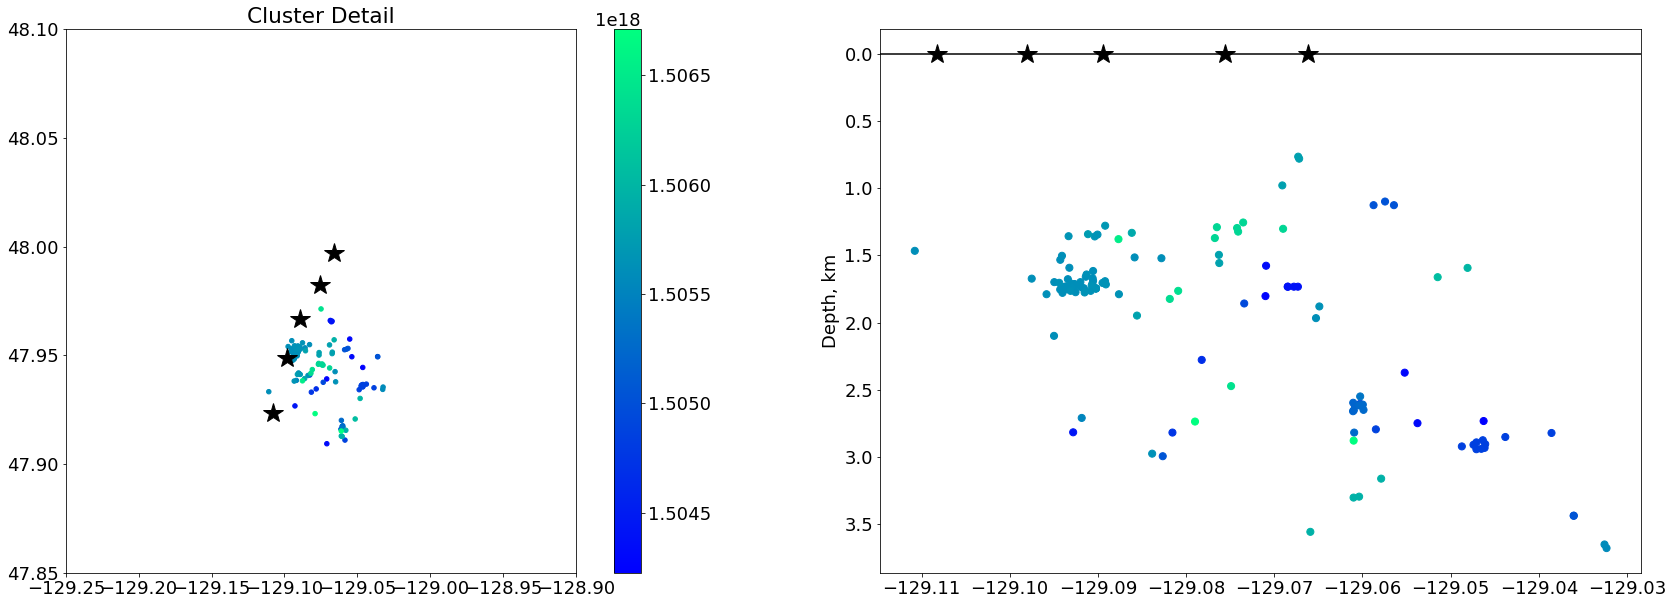

In [10]:
clust = reloc[reloc['clusterID']==1]

vent_lon=[-129.098100000000,-129.089400000000,-129.075600000000,-129.108200000000,-129.066200000000]
vent_lat=[47.9487000000000,47.9666000000000,47.9822000000000,47.9233000000000,47.9969000000000] 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1, 2,figsize=[30,10])

ax[0].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[0].set_xlim([-129.25,-128.9])
ax[0].set_ylim([47.85,48.1])
ax[0].set_aspect(1/0.67);
s =ax[0].scatter(clust['lonR'],clust['latR'],20,c=clust['eventTime'],cmap='winter')
ax[0].set_title('Cluster Detail')


ax[1].plot(vent_lon,np.zeros(len(vent_lon)),'k*',markersize=20,linestyle="none")
ss = ax[1].scatter(clust['lonR'],clust['depR'],50,c=clust['eventTime'],cmap='winter')
cbar = plt.colorbar(s,ax=ax[0])
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.ylabel('Depth, km');